In [71]:
import numpy as np
import pandas as pd

In [72]:
data = pd.DataFrame(np.random.randint(1, 10, size=(6, 9)), 
                    index=[['A', 'B', 'B', 'C', 'C', 'C'], [1, 2, 3, 4, 5, 6]], 
                    columns=[['I', 'I', 'II', 'II', 'II', 'II', 'III', 'III', 'III'], [1, 2, 1, 2, 3, 4, 1, 2, 3]] )

data

I    II          III      
     1  2  1  2  3  4   1  2  3
A 1  3  7  8  5  2  2   4  3  8
B 2  9  2  5  1  5  3   9  3  6
  3  1  5  9  1  8  3   9  6  6
C 4  1  7  9  9  2  5   1  6  5
  5  1  8  8  1  2  9   8  9  5
  6  5  6  4  5  7  8   4  9  1

In [73]:
data.index

MultiIndex([('A', 1),
            ('B', 2),
            ('B', 3),
            ('C', 4),
            ('C', 5),
            ('C', 6)],
           )

In [74]:
data['II']

1  2  3  4
A 1  8  5  2  2
B 2  5  1  5  3
  3  9  1  8  3
C 4  9  9  2  5
  5  8  1  2  9
  6  4  5  7  8

In [75]:
data.loc[:, 'I' : 'II']

I    II         
     1  2  1  2  3  4
A 1  3  7  8  5  2  2
B 2  9  2  5  1  5  3
  3  1  5  9  1  8  3
C 4  1  7  9  9  2  5
  5  1  8  8  1  2  9
  6  5  6  4  5  7  8

In [76]:
data.loc[:, ['I', 'III']]

I    III      
     1  2   1  2  3
A 1  3  7   4  3  8
B 2  9  2   9  3  6
  3  1  5   9  6  6
C 4  1  7   1  6  5
  5  1  8   8  9  5
  6  5  6   4  9  1

In [77]:
data['II'][3]

A  1    2
B  2    5
   3    8
C  4    2
   5    2
   6    7
Name: 3, dtype: int32

In [78]:
data.loc['B', :]

I    II          III      
   1  2  1  2  3  4   1  2  3
2  9  2  5  1  5  3   9  3  6
3  1  5  9  1  8  3   9  6  6

In [79]:
data.loc['B':'C', :]

I    II          III      
     1  2  1  2  3  4   1  2  3
B 2  9  2  5  1  5  3   9  3  6
  3  1  5  9  1  8  3   9  6  6
C 4  1  7  9  9  2  5   1  6  5
  5  1  8  8  1  2  9   8  9  5
  6  5  6  4  5  7  8   4  9  1

In [80]:
data.loc['B', :].loc[2, :]

I    1    9
     2    2
II   1    5
     2    1
     3    5
     4    3
III  1    9
     2    3
     3    6
Name: 2, dtype: int32

In [81]:
idx = pd.IndexSlice
idx

Trong pandas, `IndexSlice` là một đối tượng được sử dụng để lập chỉ mục dữ liệu theo nhiều chiều hoặc một phần của chỉ mục (indexing) cho các đối tượng dữ liệu có cấu trúc nhiều chiều như DataFrame hoặc Panel. Điều này cho phép bạn truy cập và xử lý các phần dữ liệu theo cách linh hoạt hơn.

Trong một số tình huống, bạn cần truy cập một phạm vi hoặc một lát cắt của dữ liệu trong DataFrame hoặc Panel của bạn, và `IndexSlice` là công cụ hữu ích để làm điều đó.

Cú pháp để sử dụng `IndexSlice` như sau:

```python
pandas.IndexSlice[start : end]
```

Trong đó:

- `start`: Đại diện cho chỉ mục bắt đầu của phạm vi mà bạn muốn truy cập.
- `end`: Đại diện cho chỉ mục cuối cùng (kết thúc) của phạm vi mà bạn muốn truy cập.

Ví dụ, giả sử bạn có một DataFrame `df` và chỉ mục của nó là 'A', 'B', 'C', 'D', và bạn muốn truy cập các dòng từ 'B' đến 'D', và cột từ 'x' đến 'y', bạn có thể sử dụng `IndexSlice` như sau:

```python
import pandas as pd

# Tạo DataFrame ví dụ
data = {'x': [1, 2, 3, 4],
        'y': [5, 6, 7, 8],
        'z': [9, 10, 11, 12]}

index = ['A', 'B', 'C', 'D']
df = pd.DataFrame(data, index=index)

# Truy cập dữ liệu trong phạm vi chỉ mục và cột cụ thể
idx = pd.IndexSlice
result = df.loc[idx['B':'D'], idx['x':'y']]

print(result)
```

Kết quả sẽ là:

```
   x  y
B  2  6
C  3  7
D  4  8
```

Như bạn có thể thấy, `IndexSlice` giúp chúng ta truy cập vào một phạm vi chỉ mục và cột cụ thể trong DataFrame một cách thuận tiện.

In [82]:
data.loc[idx[:, [1,3,5]],:]

I    II          III      
     1  2  1  2  3  4   1  2  3
A 1  3  7  8  5  2  2   4  3  8
B 3  1  5  9  1  8  3   9  6  6
C 5  1  8  8  1  2  9   8  9  5

In [83]:
idx[:, [1,3,5]]

(slice(None, None, None), [1, 3, 5])

In [84]:
data.loc[idx[:, [1]],:]

I    II          III      
     1  2  1  2  3  4   1  2  3
A 1  3  7  8  5  2  2   4  3  8

In [85]:
idx[:, [1]]

(slice(None, None, None), [1])

In [86]:
data.loc[(slice(None, None, None), [1, 3, 5]),:]

I    II          III      
     1  2  1  2  3  4   1  2  3
A 1  3  7  8  5  2  2   4  3  8
B 3  1  5  9  1  8  3   9  6  6
C 5  1  8  8  1  2  9   8  9  5

Assign index name

In [87]:
data.index.names = ['one', 'two']
data

I    II          III      
         1  2  1  2  3  4   1  2  3
one two                            
A   1    3  7  8  5  2  2   4  3  8
B   2    9  2  5  1  5  3   9  3  6
    3    1  5  9  1  8  3   9  6  6
C   4    1  7  9  9  2  5   1  6  5
    5    1  8  8  1  2  9   8  9  5
    6    5  6  4  5  7  8   4  9  1

In [88]:
data.index.names = ['one', 'two']
data.columns.names = ['first', 'second']
data

first    I    II          III      
second   1  2  1  2  3  4   1  2  3
one two                            
A   1    3  7  8  5  2  2   4  3  8
B   2    9  2  5  1  5  3   9  3  6
    3    1  5  9  1  8  3   9  6  6
C   4    1  7  9  9  2  5   1  6  5
    5    1  8  8  1  2  9   8  9  5
    6    5  6  4  5  7  8   4  9  1

One level depth  selection

In [89]:
data.xs(1, level='second', axis=1)

first    I  II  III
one two            
A   1    3   8    4
B   2    9   5    9
    3    1   9    9
C   4    1   9    1
    5    1   8    8
    6    5   4    4

Multiple level depth  selection

In [90]:
data.xs(('I', 2), level=('first', 'second'), axis=1) 

first    I
second   2
one two   
A   1    7
B   2    2
    3    5
C   4    7
    5    8
    6    6

Combining and Merging

In [91]:
df1 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'], 'A': ['A0', 'A1', 'A2', 'A3'], 'B': ['B0', 'B1', 'B2', 'B3']})
df1


,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [92]:
df2 = pd.DataFrame({'key': ['K0', 'K1', 'K1', 'K4'], 'C': ['C0', 'C1', 'C2', 'C3'], 'D': ['D0', 'D1', 'D2', 'D3']})
df2

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K1,C2,D2
3,K4,C3,D3


INNER JOIN

In [93]:
pd.merge(df1, df2, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K1,A1,B1,C2,D2


In [94]:
pd.merge(df1, df2)

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K1,A1,B1,C2,D2


LEFT OUTER JOIN

Để merge hai DataFrame dựa trên hai cột chung, bạn có thể truyền một list chứa tên hai cột vào tham số `on` của phương thức `merge()`. Điều này cho phép bạn sử dụng nhiều cột để xác định việc kết hợp giữa hai DataFrame.

Dưới đây là cú pháp để merge hai DataFrame dựa trên hai cột:

```python
result_df = pd.merge(left_df, right_df, on=['column1', 'column2'], how='left')
```

Trong đó:
- `left_df`: DataFrame bên trái mà bạn muốn merge.
- `right_df`: DataFrame bên phải mà bạn muốn merge.
- `['column1', 'column2']`: List chứa tên hai cột chung mà bạn muốn dựa vào để kết hợp hai DataFrame.
- `'how'`: Lựa chọn phương thức merge. Trong trường hợp này, bạn vẫn sử dụng `'left'` để merge left.

Ví dụ, giả sử bạn có hai DataFrame như sau:

```python
import pandas as pd

# DataFrame bên trái
left_df = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David']
})

# DataFrame bên phải
right_df = pd.DataFrame({
    'ID': [2, 4, 5],
    'Age': [25, 30, 22],
    'City': ['New York', 'San Francisco', 'Chicago']
})
```

Bây giờ, bạn muốn merge left hai DataFrame này dựa vào cột 'ID' và 'Name', ta có thể thực hiện như sau:

```python
result_df = pd.merge(left_df, right_df, on=['ID', 'Name'], how='left')
```

Kết quả (`result_df`) sẽ là:

```
   ID      Name   Age City
0   1     Alice   NaN  NaN
1   2       Bob  25.0  New York
2   3  Charlie   NaN  NaN
3   4     David  30.0  San Francisco
```

Lưu ý rằng trong ví dụ này, dữ liệu từ cả hai cột 'ID' và 'Name' của DataFrame bên trái phải khớp với dữ liệu từ cả hai cột 'ID' và 'Name' của DataFrame bên phải để tạo thành một cặp giá trị khớp để thực hiện merge left. Các cặp không khớp sẽ có giá trị NaN trong các cột 'Age' và 'City' của kết quả (`result_df`).

In [95]:
pd.merge(df1, df2, on='key', how='left')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K1,A1,B1,C2,D2
3,K2,A2,B2,NaN,NaN
4,K3,A3,B3,NaN,NaN


RIGHT OUTER JOIN

In [96]:
pd.merge(df1, df2, on='key', how='right')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K1,A1,B1,C2,D2
3,K4,NaN,NaN,C3,D3


FULL OUTER JOIN

In [97]:
pd.merge(df1, df2, on='key', how='outer')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K1,A1,B1,C2,D2
3,K2,A2,B2,NaN,NaN
4,K3,A3,B3,NaN,NaN
5,K4,NaN,NaN,C3,D3


Vertical joining DataFrame with pd.concat()

In [98]:
pd.concat([df1, df2])

,key,A,B,C,D
0,K0,A0,B0,NaN,NaN
1,K1,A1,B1,NaN,NaN
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,NaN,NaN
0,K0,NaN,NaN,C0,D0
1,K1,NaN,NaN,C1,D1
2,K1,NaN,NaN,C2,D2
3,K4,NaN,NaN,C3,D3


Can also Horizontal joining on index

In [99]:
pd.concat([df1, df2], axis=1)

,key,A,B,key,C,D
0,K0,A0,B0,K0,C0,D0
1,K1,A1,B1,K1,C1,D1
2,K2,A2,B2,K1,C2,D2
3,K3,A3,B3,K4,C3,D3


Reshaping Data

In [100]:
slice1 = data.loc[idx[:'B'], 'II']
slice1

second   1  2  3  4
one two            
A   1    8  5  2  2
B   2    5  1  5  3
    3    9  1  8  3

In [101]:
slice1.stack()

one  two  second
A    1    1         8
          2         5
          3         2
          4         2
B    2    1         5
          2         1
          3         5
          4         3
     3    1         9
          2         1
          3         8
          4         3
dtype: int32

In [102]:
slice1.unstack()

second    1              2              3              4          
two       1    2    3    1    2    3    1    2    3    1    2    3
one                                                               
A       8.0  NaN  NaN  5.0  NaN  NaN  2.0  NaN  NaN  2.0  NaN  NaN
B       NaN  5.0  9.0  NaN  1.0  1.0  NaN  5.0  8.0  NaN  3.0  3.0

In [103]:
slice1.unstack(0)

second    1         2         3         4     
one       A    B    A    B    A    B    A    B
two                                           
1       8.0  NaN  5.0  NaN  2.0  NaN  2.0  NaN
2       NaN  5.0  NaN  1.0  NaN  5.0  NaN  3.0
3       NaN  9.0  NaN  1.0  NaN  8.0  NaN  3.0

Pivoting

In [104]:
df = pd.DataFrame({
    'foo': ['one', 'one', 'one', 'two', 'two', 'two'],
    'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
    'baz': [1, 2, 3, 4, 5, 6],
    'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [105]:
df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


Load the ‘Macrodata’ dataset

In [106]:
data = pd.read_csv('pydata-book-3rd-edition\pydata-book-3rd-edition\examples\macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


Take out a slice of the data the ‘cool’ 

In [107]:
columns = pd.Index(["realgdp", "infl", "unemp"], name='stat')
columns

Index(['realgdp', 'infl', 'unemp'], dtype='object', name='stat')

In [108]:
new_data = data.reindex(columns=columns)
new_data

stat,realgdp,infl,unemp
0,2710.349,0.00,5.8
1,2778.801,2.34,5.1
2,2775.488,2.74,5.3
3,2785.204,0.27,5.6
4,2847.699,2.31,5.2
...,...,...,...
198,13324.600,-3.16,6.0
199,13141.920,-8.79,6.9
200,12925.410,0.94,8.1
201,12901.504,3.37,9.2


In [109]:
periods = pd.PeriodIndex(year=data.year,
                         quarter=data.quarter,
                         name="date")
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203)

In [110]:
periods.end_time

DatetimeIndex(['1959-03-31 23:59:59.999999999',
               '1959-06-30 23:59:59.999999999',
               '1959-09-30 23:59:59.999999999',
               '1959-12-31 23:59:59.999999999',
               '1960-03-31 23:59:59.999999999',
               '1960-06-30 23:59:59.999999999',
               '1960-09-30 23:59:59.999999999',
               '1960-12-31 23:59:59.999999999',
               '1961-03-31 23:59:59.999999999',
               '1961-06-30 23:59:59.999999999',
               ...
               '2007-06-30 23:59:59.999999999',
               '2007-09-30 23:59:59.999999999',
               '2007-12-31 23:59:59.999999999',
               '2008-03-31 23:59:59.999999999',
               '2008-06-30 23:59:59.999999999',
               '2008-09-30 23:59:59.999999999',
               '2008-12-31 23:59:59.999999999',
               '2009-03-31 23:59:59.999999999',
               '2009-06-30 23:59:59.999999999',
               '2009-09-30 23:59:59.999999999'],
              dtype=

In [111]:
new_data.index = periods.end_time
new_data

stat,realgdp,infl,unemp
date,,,
1959-03-31 23:59:59.999999999,2710.349,0.00,5.8
1959-06-30 23:59:59.999999999,2778.801,2.34,5.1
1959-09-30 23:59:59.999999999,2775.488,2.74,5.3
1959-12-31 23:59:59.999999999,2785.204,0.27,5.6
1960-03-31 23:59:59.999999999,2847.699,2.31,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,13324.600,-3.16,6.0
2008-12-31 23:59:59.999999999,13141.920,-8.79,6.9
2009-03-31 23:59:59.999999999,12925.410,0.94,8.1


In [112]:
new_data.stack()

date                           stat   
1959-03-31 23:59:59.999999999  realgdp     2710.349
                               infl           0.000
                               unemp          5.800
1959-06-30 23:59:59.999999999  realgdp     2778.801
                               infl           2.340
                                            ...    
2009-06-30 23:59:59.999999999  infl           3.370
                               unemp          9.200
2009-09-30 23:59:59.999999999  realgdp    12990.341
                               infl           3.560
                               unemp          9.600
Length: 609, dtype: float64

In [113]:
stacked = new_data.stack().reset_index().rename(columns={0:'value'})
stacked

,date,stat,value
0,1959-03-31 23:59:59.999999999,realgdp,2710.349
1,1959-03-31 23:59:59.999999999,infl,0.000
2,1959-03-31 23:59:59.999999999,unemp,5.800
3,1959-06-30 23:59:59.999999999,realgdp,2778.801
4,1959-06-30 23:59:59.999999999,infl,2.340
...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.370
605,2009-06-30 23:59:59.999999999,unemp,9.200
606,2009-09-30 23:59:59.999999999,realgdp,12990.341
607,2009-09-30 23:59:59.999999999,infl,3.560


In [114]:
pivoted = stacked.pivot(index='date', columns='stat', values='value')
pivoted

stat,infl,realgdp,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,2710.349,5.8
1959-06-30 23:59:59.999999999,2.34,2778.801,5.1
1959-09-30 23:59:59.999999999,2.74,2775.488,5.3
1959-12-31 23:59:59.999999999,0.27,2785.204,5.6
1960-03-31 23:59:59.999999999,2.31,2847.699,5.2
...,...,...,...
2008-09-30 23:59:59.999999999,-3.16,13324.600,6.0
2008-12-31 23:59:59.999999999,-8.79,13141.920,6.9
2009-03-31 23:59:59.999999999,0.94,12925.410,8.1


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Trong Python, `%matplotlib inline` là một câu lệnh dùng để chỉ định cho môi trường thực thi code biết cách hiển thị đồ họa tĩnh trực tiếp trong notebook hoặc môi trường làm việc (như Jupyter Notebook hoặc JupyterLab). Điều này cho phép các biểu đồ và hình ảnh được hiển thị ngay lập tức dưới mã code mà không cần phải sử dụng hàm `plt.show()`.

Cụ thể, `%matplotlib inline` được sử dụng cùng với thư viện `matplotlib`, giúp đồ họa được hiển thị trong cùng ô code mà nó được tạo ra. Trong trường hợp bạn không sử dụng `%matplotlib inline`, bạn sẽ cần phải gọi hàm `plt.show()` sau khi đã tạo đồ họa để có thể hiển thị chúng. Tuy nhiên, khi sử dụng `%matplotlib inline`, việc này không cần thiết.

Dưới đây là một ví dụ về cách sử dụng `%matplotlib inline`:

```python
import matplotlib.pyplot as plt

# Dòng lệnh dưới đây sẽ cho phép hiển thị đồ họa trực tiếp trong notebook
%matplotlib inline

# Tạo dữ liệu mẫu
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Vẽ đồ thị sin(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Đồ thị hàm sin(x)')
```

Khi chạy đoạn mã trên trong môi trường Jupyter Notebook hoặc JupyterLab, đồ thị `sin(x)` sẽ được hiển thị ngay dưới ô code mà không cần gọi thêm `plt.show()`.

In [116]:
import math
data = np.sin(np.arange(0, 2*math.pi, 0.1)**2)
data


array([ 0.        ,  0.00999983,  0.03998933,  0.08987855,  0.15931821,
        0.24740396,  0.35227423,  0.47062589,  0.59719544,  0.72428717,
        0.84147098,  0.935616  ,  0.99145835,  0.99290365,  0.92521152,
        0.7780732 ,  0.54935544,  0.24894679, -0.09824859, -0.45146575,
       -0.7568025 , -0.95462777, -0.99186876, -0.83776948, -0.49964188,
       -0.03317922,  0.45895149,  0.84513341,  0.99990226,  0.84936338,
        0.41211849, -0.18416478, -0.72787787, -0.99443221, -0.84489594,
       -0.31111935,  0.38354276,  0.90167577,  0.95449543,  0.47763714,
       -0.28790332, -0.89212936, -0.93545914, -0.35185859,  0.48856477,
        0.98552511,  0.73870603, -0.09869051, -0.86685116, -0.90129136,
       -0.13235175,  0.76898941,  0.94392849,  0.18329174, -0.77433666,
       -0.91915369, -0.05589739,  0.87914899,  0.79409625, -0.24980688,
       -0.99177885, -0.46984205,  0.67494352])

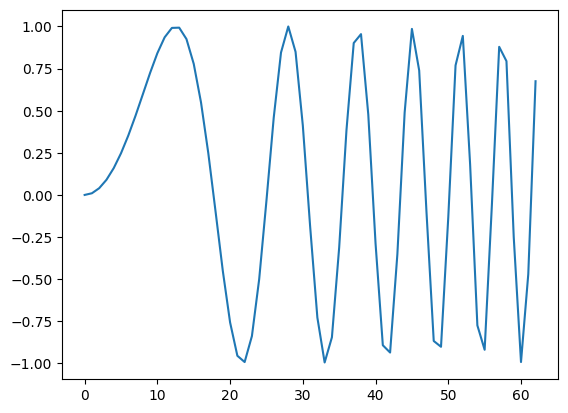

In [117]:
fig = plt.plot(data)

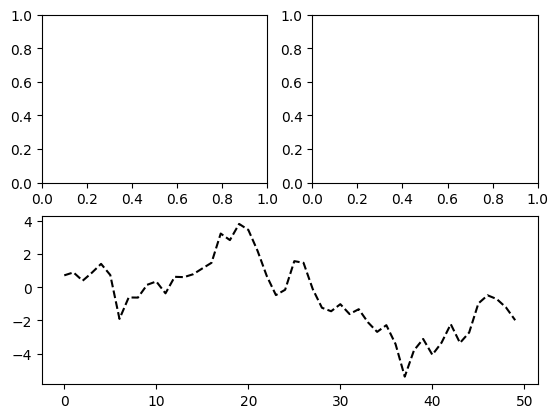

In [118]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, (3, 4))
plt.plot(np.random.randn(50).cumsum(), 'k--')
plt.show()

Trong câu lệnh `plt.plot(np.random.randn(50).cumsum(), 'k--')`, `'k--'` là một chuỗi định dạng (format string) được sử dụng để xác định cách đường được vẽ trên đồ thị. Định dạng này bao gồm hai phần chính: màu và kiểu đường.

Trong trường hợp này:

- `'k'` đại diện cho màu đen (black). Ký hiệu `'k'` là viết tắt của màu đen trong hệ thống màu RGB (Red, Green, Blue). Bạn có thể sử dụng các ký hiệu màu khác nhau để đại diện cho các màu khác nhau, ví dụ `'b'` cho màu xanh dương (blue), `'r'` cho màu đỏ (red), `'g'` cho màu xanh lá cây (green),...

- `'--'` đại diện cho kiểu đường nét đứt (dashed line). Bạn có thể sử dụng các ký hiệu khác nhau để biểu diễn các kiểu đường khác nhau, ví dụ `'-'` cho đường liền (solid line), `':'` cho đường chấm chấm (dotted line), `'-.'` cho đường gạch chấm (dash-dot line),...

Ví dụ, nếu bạn muốn vẽ đồ thị với đường nét liền màu đỏ, bạn có thể sử dụng chuỗi định dạng `'r-'`.

Dưới đây là ví dụ minh họa:

```python
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu
data = np.random.randn(50).cumsum()

# Vẽ đồ thị với đường nét đứt màu đen
plt.plot(data, 'k--')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị tích lũy')
plt.title('Đồ thị giá trị tích lũy với đường nét đứt màu đen')
plt.show()
```

Đoạn mã trên sẽ vẽ đồ thị với đường nét đứt màu đen, biểu diễn giá trị tích lũy của dữ liệu `data` theo thời gian.

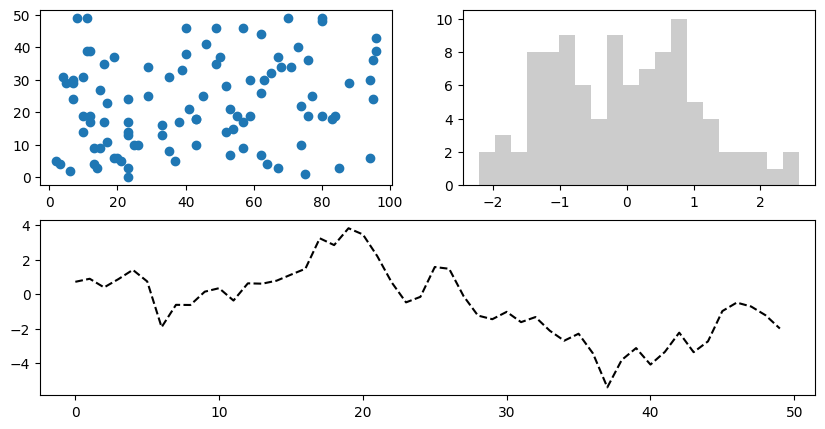

In [119]:
ax1.scatter(np.random.randint(0, 100, 100), np.random.randint(0, 50, 100))
ax2.hist(np.random.randn(100), bins=20, color='k', alpha=0.2)
fig.set_size_inches(10, 5)
fig

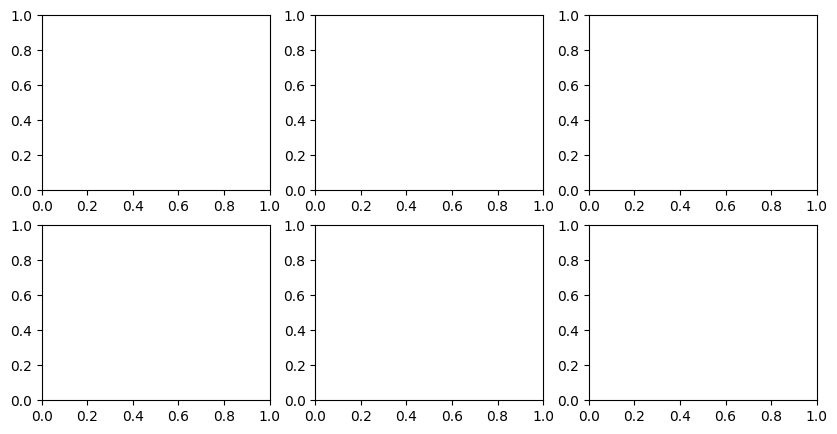

In [120]:
fig, axes = plt.subplots(2, 3, figsize = (10, 5))

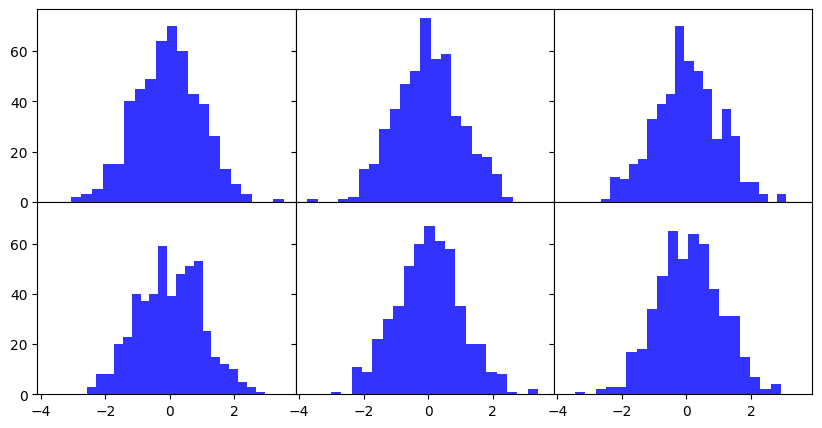

In [121]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize = (10, 5))
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        data = np.random.randn(500)
        axes[i,j].hist(data, bins=20, color='b', alpha=0.8)
plt.subplots_adjust(wspace=0, hspace=0)

Trong thư viện Matplotlib của Python, các tham số `sharex` và `sharey` được sử dụng khi bạn tạo nhiều đồ thị trong cùng một hình ảnh (figure) và muốn chia sẻ trục x hoặc trục y giữa các đồ thị đó.

Khi bạn tạo một lưới đồ thị bằng cách sử dụng hàm `plt.subplots()` với `nrows` và `ncols` lớn hơn 1, mặc định mỗi đồ thị sẽ có trục riêng biệt cho trục x và trục y. Tuy nhiên, đôi khi bạn muốn chia sẻ trục x hoặc trục y giữa các đồ thị để đồ thị trở nên chặt chẽ hơn, dễ dàng so sánh và phân tích.

Cú pháp của hàm `plt.subplots()` khi sử dụng các tham số `sharex` và `sharey` là:

```python
plt.subplots(nrows, ncols, sharex, sharey, ...)
```

Trong đó:

- `nrows`: Số hàng của lưới các đối tượng đồ thị muốn tạo.
- `ncols`: Số cột của lưới các đối tượng đồ thị muốn tạo.
- `sharex`: Giá trị boolean (True hoặc False) xác định việc chia sẻ trục x. Nếu `True`, các đồ thị sẽ chia sẻ cùng một trục x, nghĩa là chỉ có trục x của đồ thị đầu tiên sẽ được hiển thị. Nếu `False`, mỗi đồ thị sẽ có trục x riêng biệt.
- `sharey`: Giá trị boolean (True hoặc False) xác định việc chia sẻ trục y. Nếu `True`, các đồ thị sẽ chia sẻ cùng một trục y, nghĩa là chỉ có trục y của đồ thị đầu tiên sẽ được hiển thị. Nếu `False`, mỗi đồ thị sẽ có trục y riêng biệt.

Dưới đây là ví dụ minh họa về cách sử dụng `sharex` và `sharey`:

```python
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu
x = np.linspace(0, 2*np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Tạo lưới 1x2 với chia sẻ trục y
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

# Vẽ đồ thị lên từng đối tượng đồ thị tương ứng
ax1.plot(x, y1)
ax1.set_title('sin(x)')
ax1.set_ylabel('y')

ax2.plot(x, y2)
ax2.set_title('cos(x)')

# Chỉnh lại layout để tránh trục bị che đè
plt.tight_layout()
plt.show()
```

Trong ví dụ trên, chúng ta đã tạo một lưới 1x2 với chia sẻ trục y giữa hai đồ thị. Kết quả là cả hai đồ thị đều chia sẻ cùng một trục y, giúp dễ dàng so sánh biểu đồ và đồ thị trở nên chặt chẽ hơn.

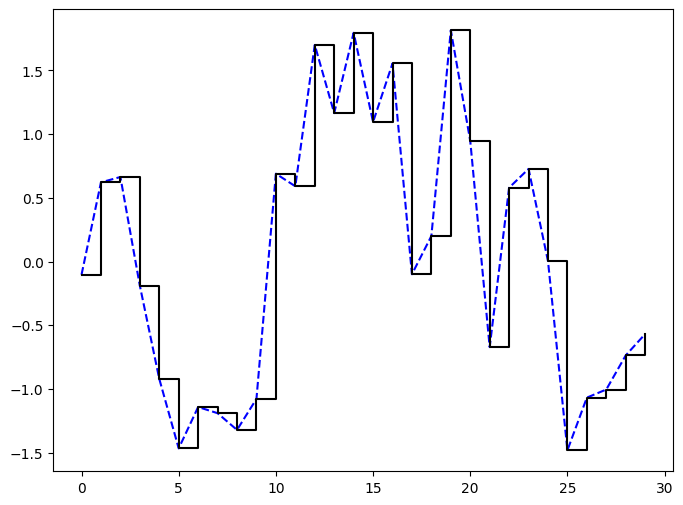

In [122]:
data = np.random.randn(30).cumsum() 
fig = plt.figure(figsize=(8,6))
plt.plot(data, 'b--', label='default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

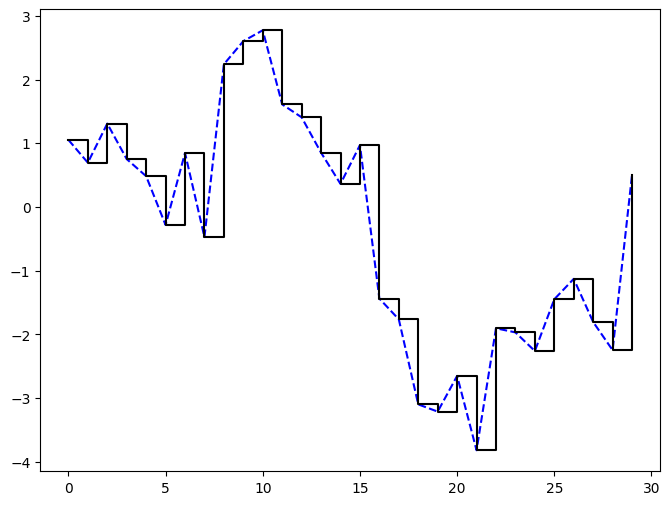

In [123]:
data = np.random.randn(30).cumsum()
fig = plt.figure(figsize=(8,6))
plt.plot(data, 'b--', label = 'default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-pre')


Text(0, 0.5, 'Price')

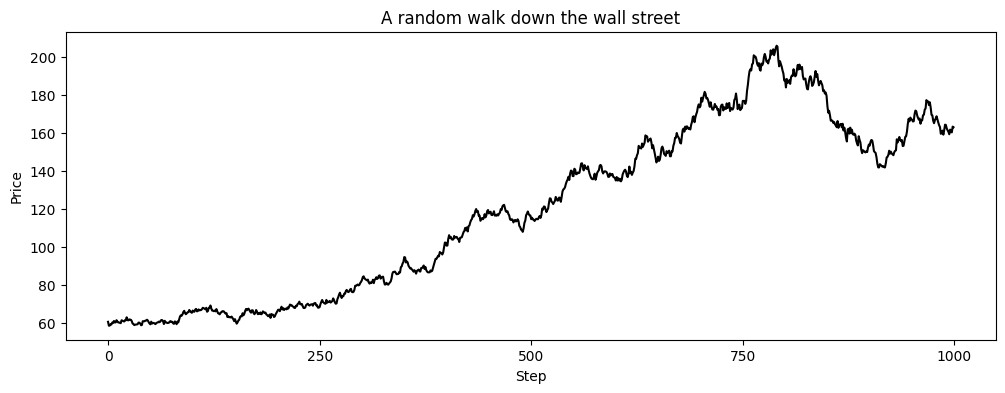

In [124]:
current_price = 60
simulated = 60 * np.exp(np.random.normal(size=1000)*0.0125).cumprod()
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(simulated, 'k-', label="scenario_1")
ax.set_xticks(list(range(0, 1250, 250)))
ax.set_title('A random walk down the wall street')
ax.set_xlabel('Step')
ax.set_ylabel('Price')


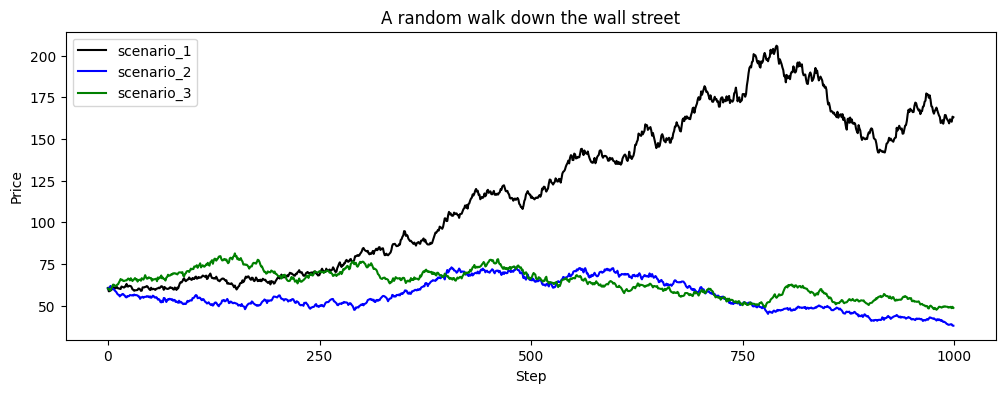

In [125]:
def simulate_price(current_price):
    data = current_price * np.exp(np.random.normal(size=1000)*0.0125).cumprod()
    return data
ax.plot(simulate_price(60), '-b', label='scenario_2')   
ax.plot(simulate_price(60), '-g', label='scenario_3')   
ax.legend(loc='best')
fig    

<AxesSubplot:>

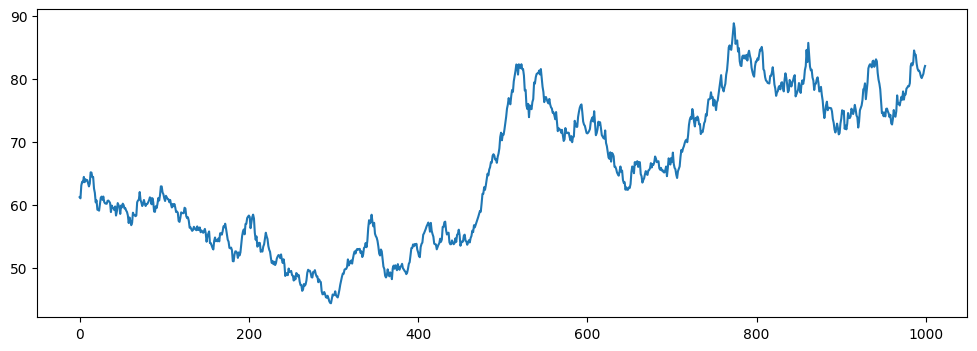

In [126]:
data = pd.Series(simulate_price(60))
data.plot(figsize=(12,4))

<AxesSubplot:>

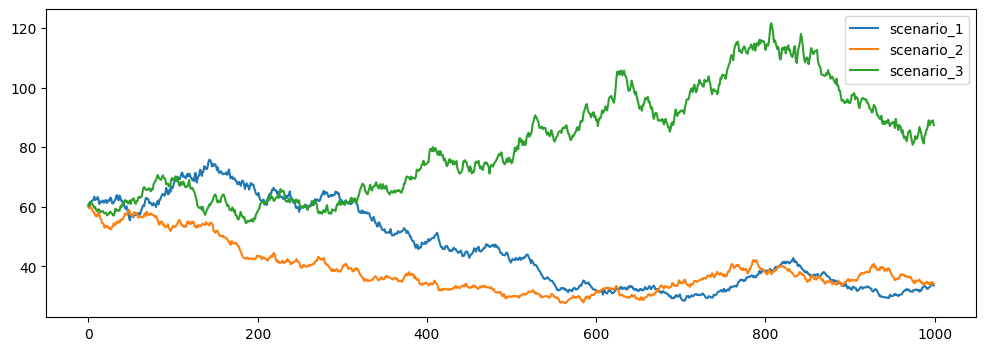

In [130]:
df = pd.DataFrame(np.transpose(np.array([simulate_price(60) for i in range(3)])), columns=["scenario_1", "scenario_2", "scenario_3"])
df.plot(figsize=(12,4))

<AxesSubplot:>

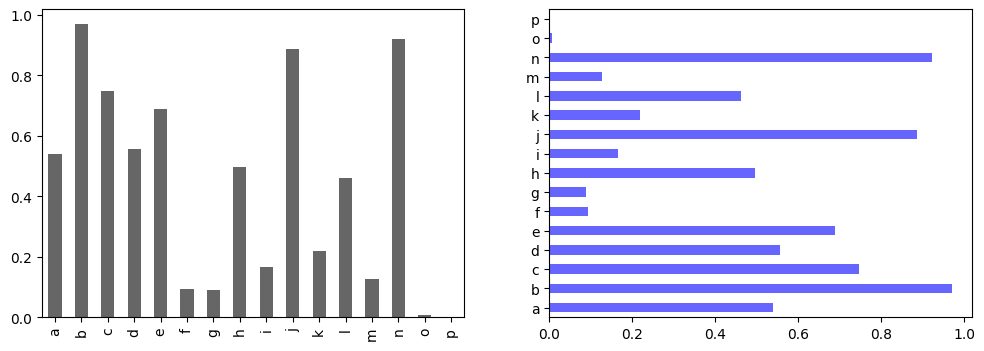

In [132]:
import string
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
data = pd.Series(np.random.rand(16), index=list(string.ascii_lowercase[:16]))
data.plot.bar(ax=axs[0], color='k', alpha=0.6)
data.plot.barh(ax=axs[1], color='b', alpha=0.6)

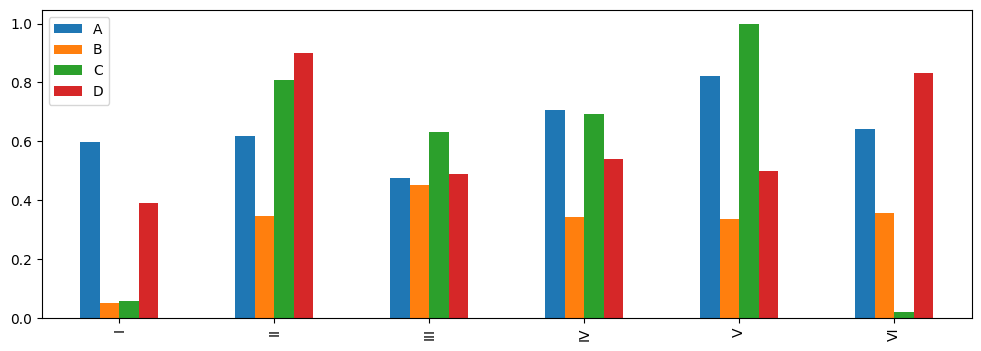

In [133]:
df = pd.DataFrame(np.random.rand(6, 4), columns=['A', 'B', 'C', 'D'], index = ['I', 'II', 'III', 'IV', 'V', 'VI'])
fig = df.plot.bar(figsize=(12,4))
fig.legend(loc='best')

In [135]:
import seaborn as sns
tips = pd.read_csv(r'pydata-book-3rd-edition\pydata-book-3rd-edition\examples\tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

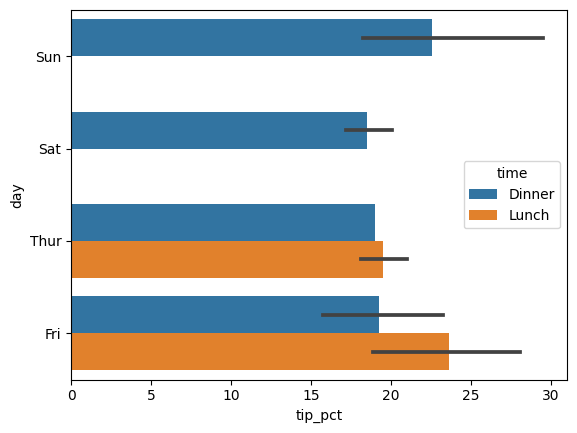

In [136]:
tips['tip_pct'] = tips['tip'] * 100 /(tips['total_bill']-tips['tip'])
sns.barplot(data=tips, x='tip_pct', y='day', hue='time', orient = 'h')

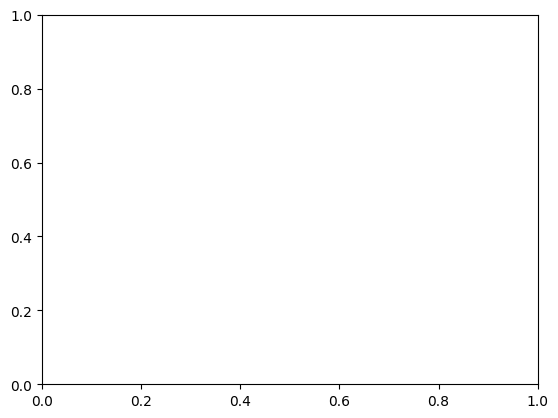

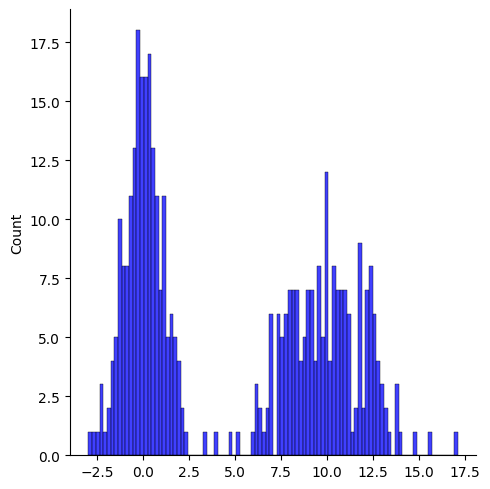

In [141]:
fig, axs = plt.subplots(1, 1)
dist1 = np.random.normal(0, 1, size=200)
dist2 = np.random.normal(10, 2, size=200)
dist = pd.Series(np.concatenate([dist1, dist2]))
sns.displot(dist, bins=100, color='b')


Text(0.5, 1.0, 'change in log tbilrate versus log cpi')

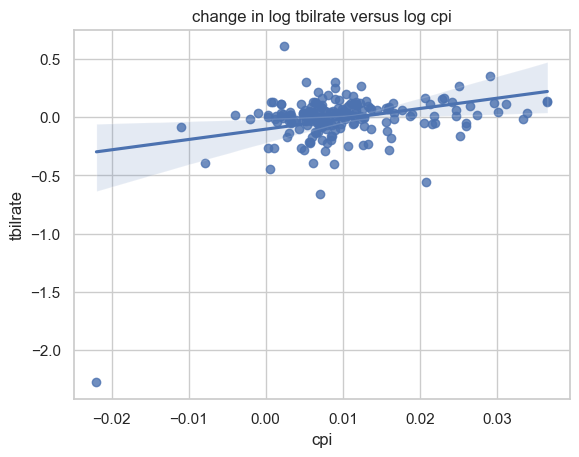

In [144]:
sns.set(style='whitegrid')
df = pd.read_csv('pydata-book-3rd-edition\pydata-book-3rd-edition\examples\macrodata.csv')
data = df[['cpi', 'tbilrate', 'realdpi', 'realcons']]
trans_data = np.log(data).diff().dropna()
fig = sns.regplot(data=trans_data, x='cpi', y='tbilrate')
fig.set_title('change in log {} versus log {}'.format('tbilrate', 'cpi'))

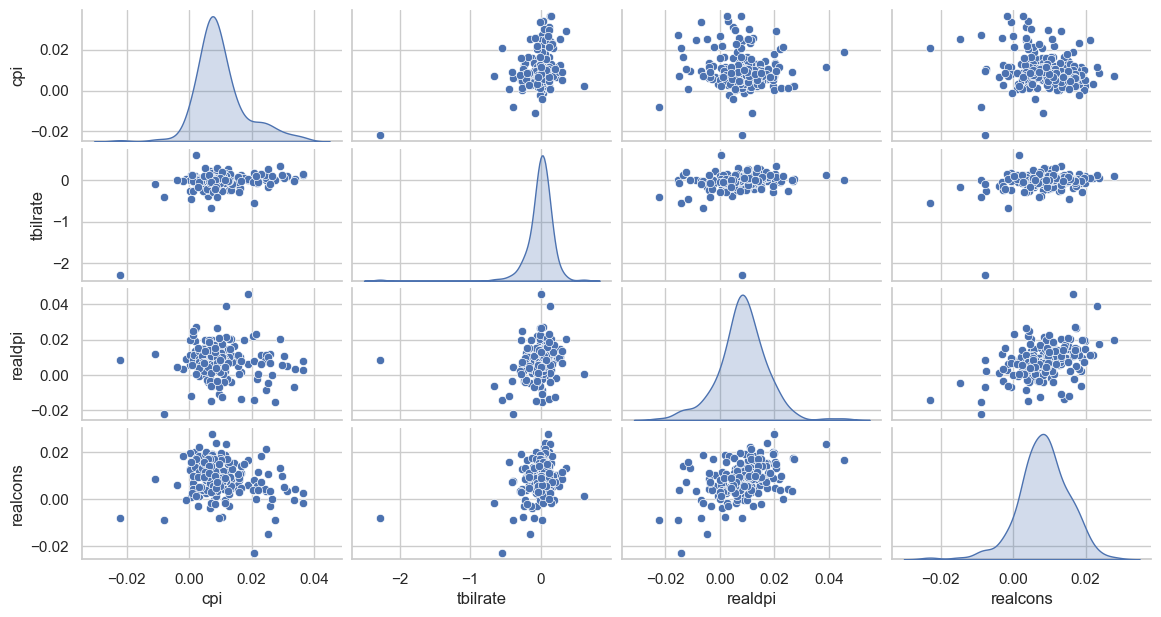

In [145]:
grid = sns.pairplot(data=trans_data, diag_kind='kde')
grid.fig.set_size_inches(12, 6)